# 7. Neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

## 7.1 Threshold logic unit

### 7.1.1 AND

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])
mAND = SGDClassifier(loss='log')
mAND.fit(X, Y)

SGDClassifier(loss='log')

In [3]:
mAND.predict(X) # Linear binary classification model can express AND

array([0, 0, 0, 1])

In [4]:
mAND.coef_, mAND.intercept_

(array([[9.8609424 , 9.94898004]]), array([-15.06665493]))

### 7.1.2 OR

In [5]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 1])
mOR = SGDClassifier(loss='log')
mOR.fit(X, Y)

SGDClassifier(loss='log')

In [6]:
mOR.predict(X) # Linear binary classification model can express OR

array([0, 1, 1, 1])

In [7]:
mOR.coef_, mOR.intercept_

(array([[ 9.84524328, 10.01285882]]), array([-4.5707089]))

### 7.1.3 NOT

In [8]:
X = np.array([[0], [1]])
Y = np.array([1, 0])
mNOT = SGDClassifier(loss='log')
mNOT.fit(X, Y)

SGDClassifier(loss='log')

In [9]:
mNOT.predict(X) # Linear binary classification model can express NOT

array([1, 0])

In [10]:
mNOT.coef_, mNOT.intercept_

(array([[-10.22164928]]), array([5.01662327]))

### 7.1.4 NAND

In [15]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([1, 1, 1, 0])
mNAND = SGDClassifier(loss='log')
mNAND.fit(X, Y)

SGDClassifier(loss='log')

In [16]:
mNAND.predict(X) # Linear binary classification model can express NAND

array([1, 1, 1, 0])

In [17]:
mNAND.coef_, mNAND.intercept_

(array([[-9.95927648, -9.8228891 ]]), array([15.06911548]))

### 7.1.5 XOR

In [22]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])
mXOR = SGDClassifier(loss='log')
mXOR.fit(X, Y)

SGDClassifier(loss='log')

In [23]:
mXOR.predict(X) # Linear binary classification model cannot express XOR

array([1, 1, 0, 0])

In [24]:
mXOR.coef_, mXOR.intercept_

(array([[-9.99128928, -0.33153056]]), array([4.69744905]))

### 7.1.7 Multi-stage linear binary classification

In [26]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])
h1 = mOR.predict(X)
h2 = mNAND.predict(X)
mAND.predict(np.array([h1, h2]).T) # Two-stage linear binary classification model can express XOR

array([0, 1, 1, 0])

## 7.2 Neural network

### 7.2.2 Multi layer neural network 

#### 7.2.2.1 Implement XOR using two layer neural network

In [27]:
W_xh = np.array([[1, -1], [1, -1]])
b_xh = np.array([-0.5, 1.5])
W_hy = np.array([[1], [1]])
b_hy = np.array([-1.5])

x = np.array([1, 1])
h = np.heaviside(x @ W_xh + b_xh, 0)
y = np.heaviside(h @ W_hy + b_hy, 0)
print(h)
print(y)

[1. 0.]
[0.]


In [28]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
h = np.heaviside(X @ W_xh + b_xh, 0)
y = np.heaviside(h @ W_hy + b_hy, 0)
print(h)
print(y)

[[0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]]
[[0.]
 [1.]
 [1.]
 [0.]]


## 7.3 Universal approximation theorem

In [29]:
# f(x) = Σ v_i * sigmoid(w_i * x + b_i)
def f(x, v, w, b):
    def sigmoid(x):  
        return np.exp(-np.logaddexp(0, -x))
    return np.dot(sigmoid(np.outer(x, w) + b), v)

In [32]:
def init_graph(xmin, xmax, ymin, ymax):
    fig, ax = plt.subplots(dpi=150)
    ax.set_xlim(xmin, xmax)
    ax.set_xticks(range(xmin, xmax+1, 2))
    ax.set_xticks(range(xmin, xmax+1, 1), minor=True)
    ax.set_ylim(ymin, ymax)
    ax.grid()
    return fig, ax

xmin, xmax = -10, 10
X = np.linspace(xmin, xmax, 1000)

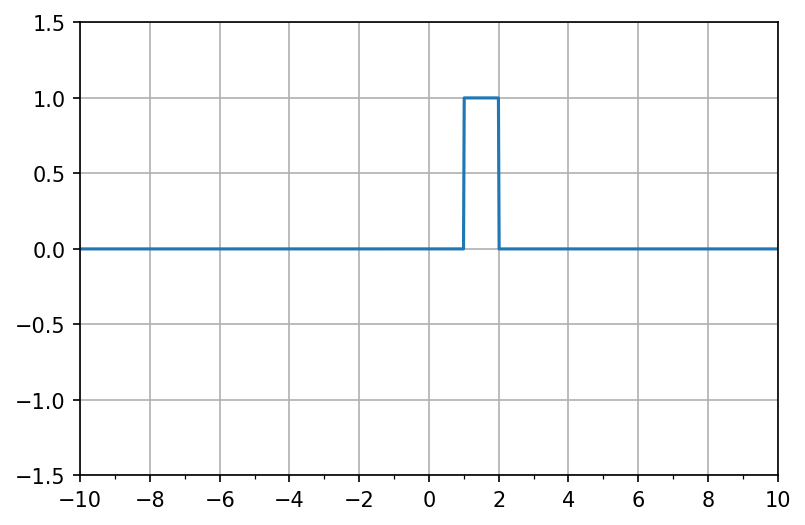

In [33]:
v = np.array([1, -1])
w = np.array([1000, 1000])
b = np.array([-1000, -2000])

fig, ax = init_graph(xmin, xmax, -1.5, 1.5)
ax.plot(X, f(X, v, w, b))
plt.show()

## 7.4 Exercise

In [34]:
def G(x):
    if -5 <= x < 4:
        i = int(x + 5)
        return [-1, 0, 1, 0, -1, 1, 0, 1, -1][i]
    else:
        return 0

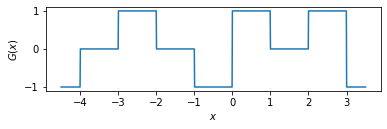

In [36]:
def plot(ax, f):
    X = np.linspace(-4.5, 3.5, 1000)
    Y = f(X)
    
    ax.plot(X, Y, '-')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$G(x)$')
    ax.set_aspect('equal')

fig, ax = plt.subplots()
g = np.vectorize(G)
plot(ax, g)
plt.show()

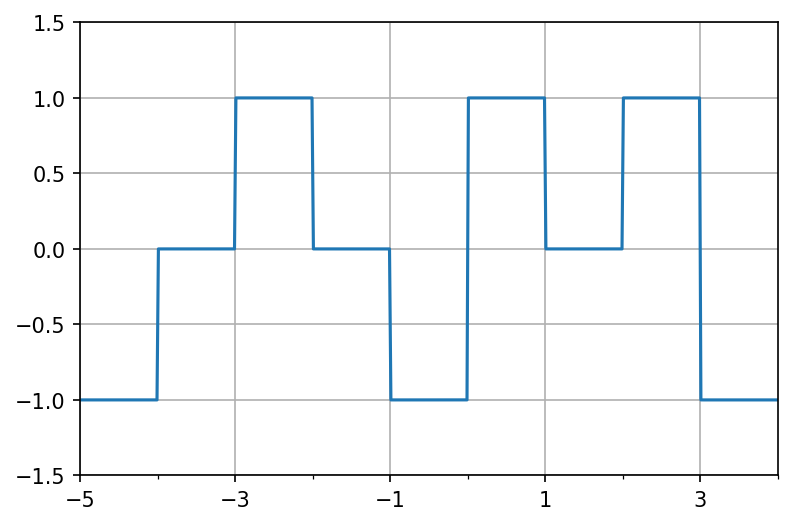

In [45]:
# Reproduce G(x) using f(x, w, v, b)

v = np.array([-2, 1, 1, -1, -1, 2, -1, 1, -2])
w = np.array([0, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])
b = np.array([0, 4000, 3000, 2000, 1000, 0, -1000, -2000, -3000])

xmin = -5
xmax = 4
X = np.linspace(xmin, xmax, 1000)
fig, ax = init_graph(xmin, xmax, -1.5, 1.5)
ax.plot(X, f(X, v, w, b))
plt.show()